<h1>Creazione serie storica mensile decessi COVID-19 confermati

In [1]:
import pandas as pd
decessi_covid = pd.read_csv('../csv/decessi_covid19_30giugno.csv')
decessi_covid.head()

,data,deceduti
0,2020-02-24,7.0
1,2020-02-25,3.0
2,2020-02-26,2.0
3,2020-02-27,5.0
4,2020-02-28,4.0


In [2]:
decessi_covid = decessi_covid[decessi_covid['data'] > '2020-02-29']

In [3]:
decessi_covid.data = pd.to_datetime(decessi_covid.data)
decessi_covid.deceduti = pd.to_numeric(decessi_covid.deceduti)

decessi_covid=decessi_covid.set_index('data')
decessi_covid.head()

,deceduti
data,
2020-03-01,5.0
2020-03-02,18.0
2020-03-03,27.0
2020-03-04,28.0
2020-03-05,41.0


In [4]:
decessi_covid = decessi_covid.groupby(pd.Grouper(freq='M')).sum()
decessi_covid.head(10)

,deceduti
data,
2020-03-31,12399.0
2020-04-30,15539.0
2020-05-31,5448.0
2020-06-30,1352.0


In [5]:
ts_decessi_covid = decessi_covid.deceduti

<h1>Creazione serie storica mensile decessi 7357 comuni

In [6]:
df = pd.read_csv('../csv/serie_storica.csv')
df.head()

,DATA,TOTALE
0,2015-01-01,2508
1,2015-01-02,2079
2,2015-01-03,2107
3,2015-01-04,2135
4,2015-01-05,2199


In [7]:
df['DATA'] = pd.to_datetime(df['DATA'])
df.TOTALE = pd.to_numeric(df.TOTALE)

In [8]:
#PERIODO COVID
df_covid_period = df[df['DATA'] > '2020-02-29']
df_covid_period.head()

,DATA,TOTALE
1886,2020-03-01,1838
1887,2020-03-02,1948
1888,2020-03-03,1959
1889,2020-03-04,1823
1890,2020-03-05,1997


In [9]:
df_covid_period = df_covid_period.set_index('DATA')
df_covid_period.head()

,TOTALE
DATA,
2020-03-01,1838
2020-03-02,1948
2020-03-03,1959
2020-03-04,1823
2020-03-05,1997


In [10]:
df_covid_period = df_covid_period.groupby(pd.Grouper(freq='M')).sum()
df_covid_period.head(10)

,TOTALE
DATA,
2020-03-31,82867
2020-04-30,67805
2020-05-31,48326
2020-06-30,43247


In [11]:
ts_covid_period = df_covid_period.TOTALE

<h1>Creazione serie storica predizione modello SARIMA mesile

In [12]:
predictions = pd.read_csv('../csv/predictions_SARIMA_7357comuni.csv')

predictions.dropna(inplace=True)
predictions.head()

,Unnamed: 0,predicted_mean
0,2015-01-31,0.000000
1,2015-02-28,63323.839318
2,2015-03-31,57750.837865
3,2015-04-30,53269.209918
4,2015-05-31,48857.560687


In [13]:
predictions.rename(columns={'Unnamed: 0': 'Data', 'predicted_mean':'Totale'}, inplace=True)
predictions.dropna(inplace=True)
predictions.head()

,Data,Totale
0,2015-01-31,0.000000
1,2015-02-28,63323.839318
2,2015-03-31,57750.837865
3,2015-04-30,53269.209918
4,2015-05-31,48857.560687


In [14]:
predictions['Data'] = pd.to_datetime(predictions['Data'])
predictions.Totale = pd.to_numeric(predictions.Totale)

#PERIODO COVID
predictions_covid_period = predictions[predictions['Data'] > '2020-02-29']
predictions_covid_period.head()

,Data,Totale
62,2020-03-31,56534.933750
63,2020-04-30,50129.783354
64,2020-05-31,48220.554311
65,2020-06-30,48927.148330


In [15]:
predictions_covid_period = predictions_covid_period.set_index('Data')
predictions_covid_period.head()

,Totale
Data,
2020-03-31,56534.933750
2020-04-30,50129.783354
2020-05-31,48220.554311
2020-06-30,48927.148330


In [16]:
ts_predictions_covid_period = predictions_covid_period.Totale

<h1>Intervalli di confidenza

<h3>Limite massimo

In [17]:
upper = pd.read_csv('../csv/predictions_SARIMA_upper.csv')
upper.head()

,Unnamed: 0,upper TOTALE
0,2015-01-31,90666.572140
1,2015-02-28,83105.087156
2,2015-03-31,77278.293801
3,2015-04-30,71685.527083
4,2015-05-31,67036.886463


In [20]:
upper.rename(columns={'Unnamed: 0': 'Data', 'upper TOTALE':'Totale'}, inplace=True)
upper['Data'] = pd.to_datetime(upper['Data'])
upper.Totale = pd.to_numeric(upper.Totale)
upper.head()

,Data,Totale
0,2015-01-31,90666.572140
1,2015-02-28,83105.087156
2,2015-03-31,77278.293801
3,2015-04-30,71685.527083
4,2015-05-31,67036.886463


In [21]:
upper = upper[upper['Data'] > '2020-02-29']
upper = upper.set_index('Data')
upper.head()

,Totale
Data,
2020-03-31,61193.181268
2020-04-30,54821.634905
2020-05-31,53847.877181
2020-06-30,54707.265912


In [22]:
upper = upper.Totale

<h3>Limite minimo

In [23]:
lower = pd.read_csv('../csv/predictions_SARIMA_lower.csv')
lower.head()

,Unnamed: 0,lower TOTALE
0,2015-01-31,-90666.572140
1,2015-02-28,43542.591479
2,2015-03-31,38223.381928
3,2015-04-30,34852.892753
4,2015-05-31,30678.234910


In [24]:
lower.rename(columns={'Unnamed: 0': 'Data', 'lower TOTALE':'Totale'}, inplace=True)
lower['Data'] = pd.to_datetime(lower['Data'])
lower.Totale = pd.to_numeric(lower.Totale)
lower.head()

,Data,Totale
0,2015-01-31,-90666.572140
1,2015-02-28,43542.591479
2,2015-03-31,38223.381928
3,2015-04-30,34852.892753
4,2015-05-31,30678.234910


In [25]:
lower = lower[lower['Data'] > '2020-02-29']
lower = lower.set_index('Data')
lower.head()

,Totale
Data,
2020-03-31,51876.686231
2020-04-30,45437.931803
2020-05-31,42593.231441
2020-06-30,43147.030748


In [26]:
lower = lower.Totale

<h1> CONFRONTO DELLE SERIE STORICHE DAL 24/02/2020 AL 30/06/2020 
 

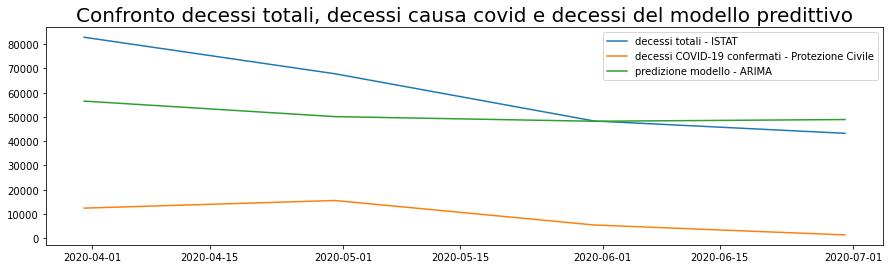

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))
plt.title('Confronto decessi totali, decessi causa covid e decessi del modello predittivo', size=20)
plt.plot(ts_covid_period, label='decessi totali - ISTAT')
plt.plot(ts_decessi_covid, label='decessi COVID-19 confermati - Protezione Civile')
plt.plot(ts_predictions_covid_period, label='predizione modello - ARIMA')

plt.legend()
plt.show()

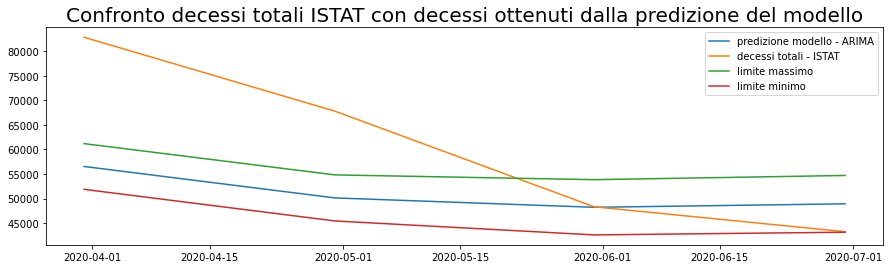

In [28]:
plt.figure(figsize=(15,4))
plt.title('Confronto decessi totali ISTAT con decessi ottenuti dalla predizione del modello', size=20)
plt.plot(ts_predictions_covid_period, label='predizione modello - ARIMA')
plt.plot(ts_covid_period, label='decessi totali - ISTAT')
plt.plot(upper, label='limite massimo')
plt.plot(lower, label='limite minimo')
plt.legend()
plt.show()

<p> <b>n:</b> decessi covid secondo il modello
    <br />
    <b>ts_covid_period:</b> decessi totali registrati dell'ISAT da febbraio a maggio
    <br />
    <b>ts_predictions_covid_period:</b> decessi previsti dal modello da febbraio a maggio 
</p>

<h2>Calcolo dei decessi COVID-19 secondo il modello predittivo

Differenza tra i decessi totali rilasciati dall'ISTAT e i decessi secondo la previsione del modello SARIMA.

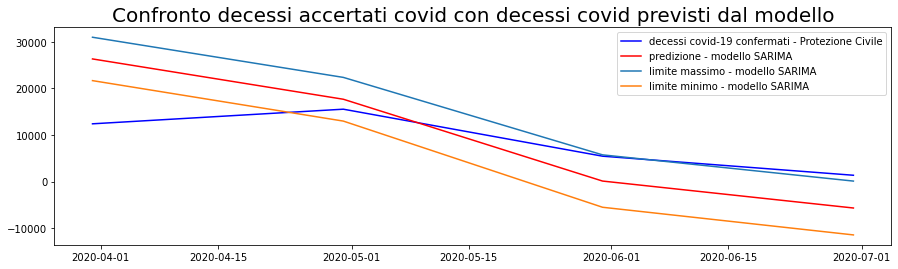

In [29]:
n = ts_covid_period - ts_predictions_covid_period
n_upper = ts_covid_period - lower
n_lower = ts_covid_period - upper

plt.figure(figsize=(15,4))
plt.title('Confronto decessi accertati covid con decessi covid previsti dal modello', size=20)
plt.plot(ts_decessi_covid, color='blue', label='decessi covid-19 confermati - Protezione Civile')
plt.plot(n, color='red', label='predizione - modello SARIMA')
plt.plot(n_upper, label='limite massimo - modello SARIMA')
plt.plot(n_lower, label='limite minimo - modello SARIMA')
plt.legend()
plt.show()

<h3>Numero totale dei decessi accertati COVID-19 nei mesi di marzo, aprile, maggio e giugno 2020

In [32]:
m = ts_decessi_covid.sum()
print(int(m))

34738


<h3>Numero totale dei decessi COVID-19 previsti dal modello SARIMA nei mesi di marzo e aprile 2020</h3>

<h4>Valore medio

In [34]:
total = n.sum()
print(int(total))

38432


<h4>Valore massimo

In [35]:
total_upper = n_upper.sum()
print(int(total_upper))

59190


<h4>Valore minimo

In [36]:
total_lower = n_lower.sum()
print(int(total_lower))

17675


<h3>Stima del numero dei decessi COVID-19 non registrati secondo il modello predittivo SARIMA nei mesi di marzo, aprile, maggio e giugno 2020

<h4>Valore medio

In [37]:
x = ts_covid_period - ts_predictions_covid_period - ts_decessi_covid
x = x.sum()
print(int(x))

3694


<h4>Valore massimo

In [38]:
x_upper = ts_covid_period - lower - ts_decessi_covid
x_upper = x_upper.sum()
print(int(x_upper))

24452


<h4>Valore minimo

In [39]:
x_lower = ts_covid_period - upper - ts_decessi_covid
x_lower = x_lower.sum()
print(int(x_lower))

-17062
